In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import ensemble, tree, linear_model
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.utils import shuffle

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

In [2]:
display(train.head())
print(train.info())
print(train.describe())
print(len(train.columns))
train.MSSubClass.astype('str')
test.MSSubClass.astype('str')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

0        20
1        20
2        60
3        60
4       120
       ... 
1454    160
1455    160
1456     20
1457     85
1458     60
Name: MSSubClass, Length: 1459, dtype: object

In [3]:
NAs = pd.concat([train.isnull().sum(), test.isnull().sum()], axis=1, keys=['Train', 'Test'])
NAs[NAs.sum(axis=1) > 0]

,Train,Test
Alley,1369,1352.0
BsmtCond,37,45.0
BsmtExposure,38,44.0
BsmtFinSF1,0,1.0
BsmtFinSF2,0,1.0
BsmtFinType1,37,42.0
BsmtFinType2,38,42.0
BsmtFullBath,0,2.0
BsmtHalfBath,0,2.0
BsmtQual,37,44.0


In [4]:
# Prints R2 and RMSE scores
def get_score(prediction, lables):    
    print('R2: {}'.format(r2_score(prediction, lables)))
    print('RMSE: {}'.format(np.sqrt(mean_squared_error(prediction, lables))))

# Shows scores for train and validation sets    
def train_test(estimator, x_trn, x_tst, y_trn, y_tst):
    prediction_train = estimator.predict(x_trn)
    # Printing estimator
    print(estimator)
    # Printing train scores
    get_score(prediction_train, y_trn)
    prediction_test = estimator.predict(x_tst)
    # Printing test scores
    print("Test")
    get_score(prediction_test, y_tst)

In [5]:
corr_sorted = train.corr()['SalePrice'].sort_values()[:-1]
corr_sorted = corr_sorted[abs(corr_sorted) > 0.1]
uncorr_columns = corr_sorted.index.values

In [6]:
train_labels = train.pop('SalePrice')
features = pd.concat([train, test], keys=['train', 'test'])
features.drop(uncorr_columns, axis = 1, inplace = True)

In [7]:
len(features.columns)

54

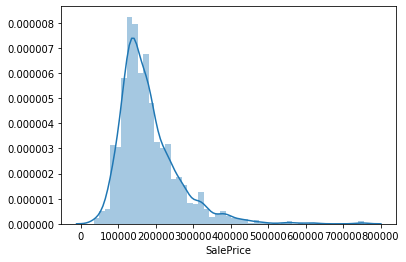

In [8]:
ax = sns.distplot(train_labels)

# 写一个数据预处理的pipeline
# numerical
### 缺失值median
### 删除相关性低的（这里不做）
### polynomial展开（这里不做）
### discretinization (for tree based model)
### scaling
# categorical
### 缺失值MISSING
### one hot encoding(drop = True) (不做ordinal的数据了)
## Feature Union

In [9]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')
# 这个本该是cat但却是数字
_ = train.MSSubClass.astype('str')
_ = test.MSSubClass.astype('str')

cols = train.columns
num_cols = train._get_numeric_data().columns
cat_cols=list(set(cols) - set(num_cols))


In [10]:
from sklearn.base import BaseEstimator, TransformerMixin
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        self.attribute_need = list(set(self.attribute_names) & set(X.columns))
        return X[self.attribute_need]
#         return X[self.attribute_names]
    
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import FeatureUnion

num_pipeline = Pipeline([
        ("select_numeric", DataFrameSelector( num_cols )),
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ])
cat_pipeline = Pipeline([
        ("select_cat", DataFrameSelector( cat_cols )),
        ("imputer", SimpleImputer(strategy="constant", fill_value="MISSING")),
        ("onehot_encoder", OneHotEncoder(drop = "first") ),
    ])
preprocess = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

In [17]:
x_ori = pd.read_csv('./data/train.csv')
display(x_ori.corr()['SalePrice'])
corr_sorted = x_ori.corr()['SalePrice'].sort_values()[:-1]
corr_sorted = corr_sorted[abs(corr_sorted) > 0.1]
uncorr_columns = corr_sorted.index.values
y_ori = x_ori.pop('SalePrice')
x_less = x_ori.drop(uncorr_columns, axis = 1)
y_log = np.log(y_ori)

Id              -0.021917
MSSubClass      -0.084284
LotFrontage      0.351799
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.486362
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
SalePrice        1.000000
Name: SalePr

In [18]:
from sklearn.ensemble import RandomForestClassifier

ENSTest = linear_model.ElasticNetCV(alphas=[0.0001, 0.0005, 0.001, 0.01, 0.1, 1, 10], l1_ratio=[.01, .1, .5, .9, .99], max_iter=5000)



In [19]:
for x, y in [[x_ori, y_ori], [x_less, y_ori], [x_ori, y_log], [x_less, y_log]]:
    x = preprocess.fit_transform(x)
    X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=2019)
    ENSTest.fit(X_train, y_train)
    y_pred = ENSTest.predict(X_test)
    get_score(y_pred, y_test)

R2: 0.8884611975598921
RMSE: 24325.76973726931
R2: 0.7881011500724424
RMSE: 32635.667449864894
R2: 0.8798836980689639
RMSE: 0.12935044816890276
R2: 0.7835075520181967
RMSE: 0.1736845995712249
